## Basic Information

This is an extension of my USC Applied Statistics Course Project. USC students love skateboards. In this notebook, I analyze how USC skateboard traffic varies by time, gender, skateboard type and other interesting factors.

## Preparation

In [1]:
import pandas as pd
import numpy as np
sb_data = pd.read_excel('USC Skateboard Traffic Data.xlsx')

## How is time related to USC skateboard traffic?

Null Hypothesis: The amount of skateboards per minute between xx:50 and xx:59 is equal to or smaller than that between xx:00 and xx:49. (xx is the hour.)

Alternative Hypothesis: The amount of skateboards per minute between xx:50 and xx:59 is greater than that between xx:00 and xx:49.

In [2]:
sb_data_time = sb_data.copy()
sb_data_time = sb_data_time[sb_data_time.Location != 'In front of RTCC']
sb_data_time.Time = sb_data_time.Time.astype('str')
hour_temp = []
minute_temp = []
for i in sb_data_time.Time:
    hour_temp.append(i.split(':')[0])
    minute_temp.append(i.split(':')[1])
sb_data_time['HOUR'] = hour_temp
sb_data_time['MIN'] = minute_temp
sb_data_time['HOUR'] = sb_data_time['HOUR'].astype('int')
sb_data_time['MIN'] = sb_data_time['MIN'].astype('int')

skateboard_per_min_A is the amount of skateboards per minute between xx:50 and xx:59.

skateboard_per_min_B is the amount of skateboards per minute between xx:00 and xx:49.

This cell returns a data table to compare the two time periods.

In [3]:
skateboard_per_min_A = []
skateboard_per_min_B = []
for loc in sb_data_time['Location'].unique():
    skateboard_per_min_A.append(len(sb_data_time[(sb_data_time.Location == loc) & (sb_data_time.MIN >= 50) & (sb_data_time.MIN <= 59)])/10)
    skateboard_per_min_B.append(len(sb_data_time[(sb_data_time.Location == loc) & (sb_data_time.MIN >= 0) & (sb_data_time.MIN <= 49)])/50)
index = ['The amount of skateboards per minute between xx:50 and xx:59', 'The amount of skateboards per minute between xx:00 and xx:49']
columns = ['Observation 1', 'Observation 2', 'Observation 3', 'Observation 4']
skateboard_per_min = pd.DataFrame(np.array([skateboard_per_min_A, skateboard_per_min_B]), index = index, columns = columns)
skateboard_per_min

,Observation 1,Observation 2,Observation 3,Observation 4
The amount of skateboards per minute between xx:50 and xx:59,5.8,9.30,6.10,1.60
The amount of skateboards per minute between xx:00 and xx:49,2.2,2.56,0.98,1.16


This cell returns a bar chart to compare the two time periods.

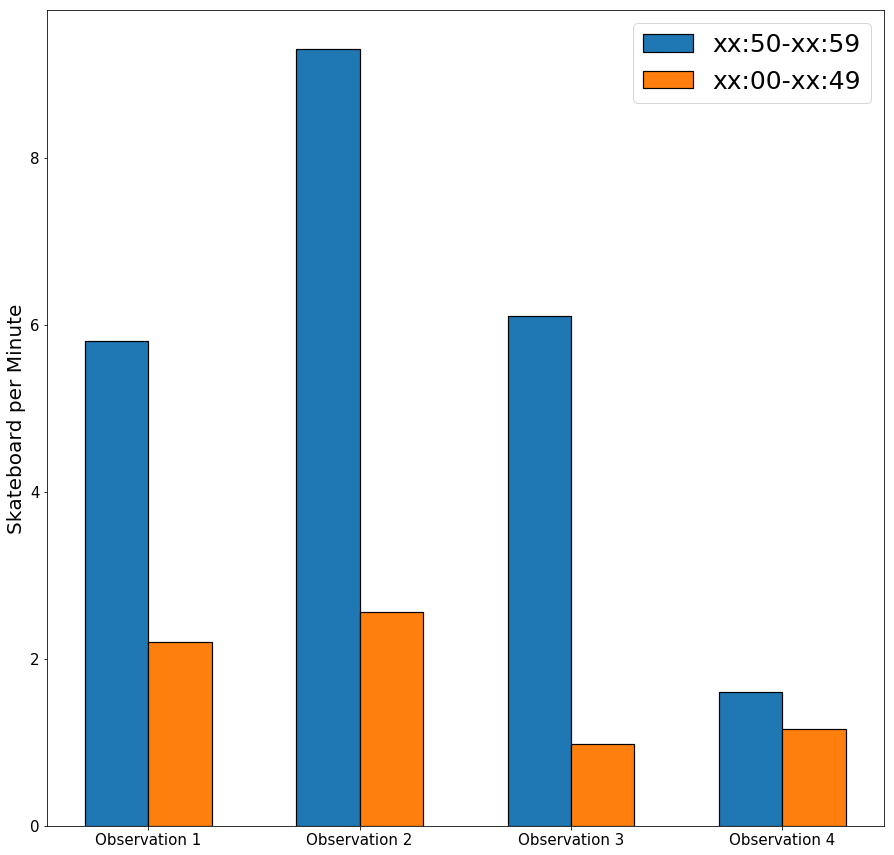

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
width = 0.3
bar1 = ax.bar(np.arange(1, 5), skateboard_per_min_A, width = width, edgecolor='black', linewidth=1.2)
bar2 = ax.bar(np.arange(1.3, 5.3, 1), skateboard_per_min_B, width = width, edgecolor='black', linewidth=1.2)
plt.ylabel('Skateboard per Minute', fontsize = 20)
plt.xticks(np.arange(1.15, 5.15, 1), columns, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend((bar1, bar2), ('xx:50-xx:59', 'xx:00-xx:49'), fontsize = 25)
plt.show()

T-test is utilized in this cell to check the level of statistical significance of the alternative hypothesis.

In [6]:
from scipy import stats
p_value = stats.ttest_ind(skateboard_per_min_A, skateboard_per_min_B)[1]/2
print('One tailed p-value is ' + str(p_value) + '.')

One tailed p-value is 0.025090837902175256.


Conclusion: We have sufficient evidence to claim that The amount of skateboards per minute between xx:50 and xx:59 is greater than that between xx:00 and xx:49.

## Is the distribution of USC skateboard traffic unimodal within one-hour period?

For each minute in an hour, I calculated the average amount of skateboards per minute in four random locations at USC. The data was rescaled by dividing all averages by the largest averages. The new variable is called "Frequency Index", which is a number between 0 and 1. If there are many skateboards in that minute, the Frequency Index is close to 1; if there are few skateboards in that minute, the Frequency Index is close to 0.

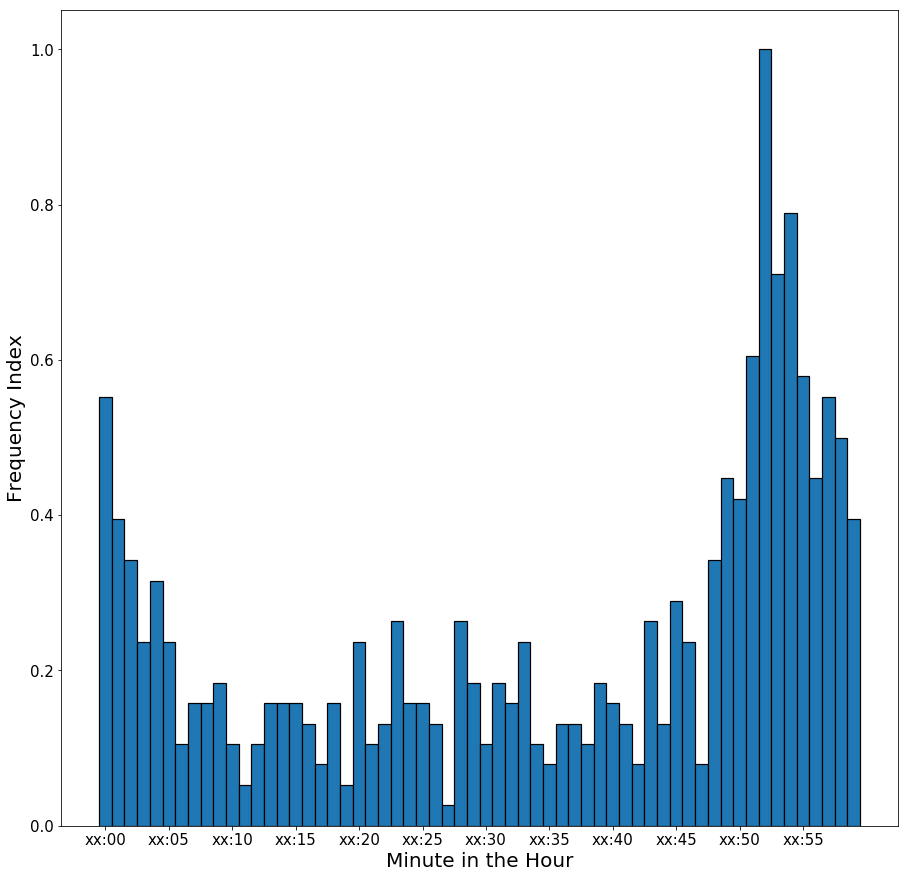

In [7]:
freq_table = np.zeros([4, 60])
row_count = 0
for loc in sb_data_time.Location.unique():
    freq = []
    loc_fixed = sb_data_time[sb_data_time.Location == loc]
    for minute in range(60):
        freq.append(len(loc_fixed[loc_fixed.MIN == minute]))
    freq_table[row_count] = freq
    row_count = row_count + 1
freq_dtframe = pd.DataFrame(freq_table.T, columns = columns)
freq_dtframe = freq_dtframe.reset_index()
freq_dtframe = freq_dtframe.rename(columns = {'index': 'Minute in the Hour'})
freq_dtframe.index = freq_dtframe['Minute in the Hour']
del freq_dtframe['Minute in the Hour']
minute_dtframe = pd.DataFrame(freq_dtframe.mean(axis = 1)/np.max(freq_dtframe.mean(axis = 1)), columns = ['Frequency Index'])
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(minute_dtframe.index, minute_dtframe['Frequency Index'], width=1, edgecolor='black', linewidth=1.2)
plt.xlabel('Minute in the Hour', fontsize = 20)
plt.ylabel('Frequency Index', fontsize = 20)
x_labels = []
for i in range(0, 60, 5):
    if (i<10):
        x_labels.append('xx:0' + str(i))
    else:
        x_labels.append('xx:' + str(i))
plt.xticks(np.arange(0, 60, 5), x_labels, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Conclusion: The distribution seems to be unimodal. The peak is at xx:52.

Is there a relationship between delta time from xx:52 and the frequency index?

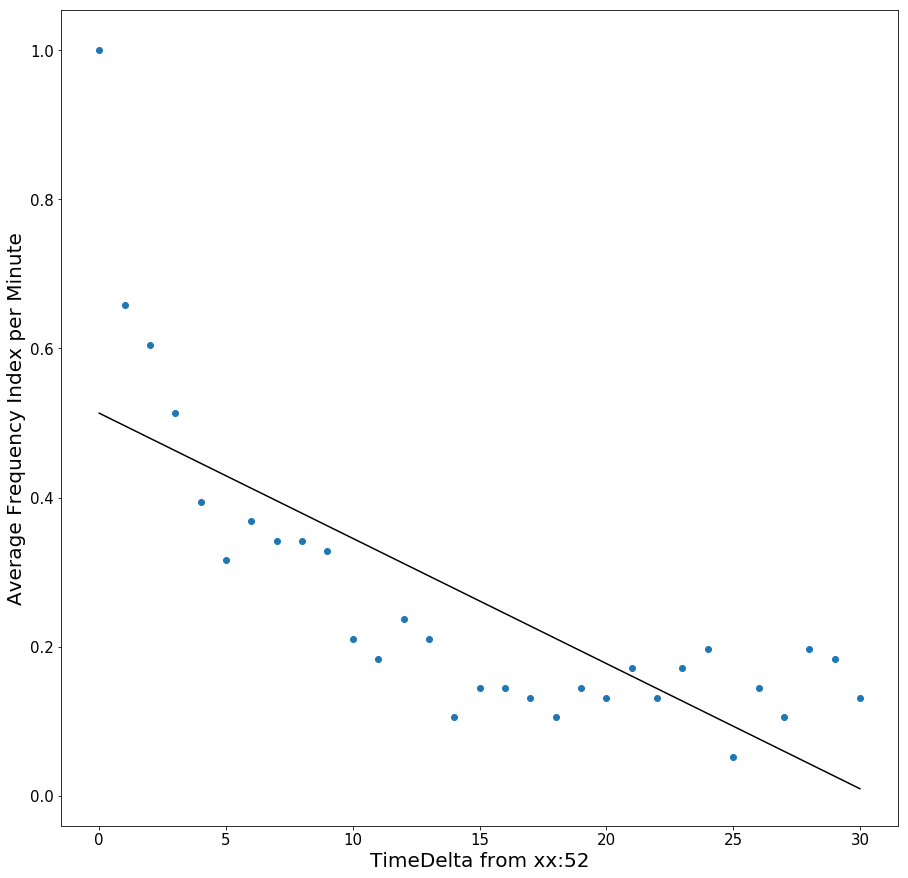

In [8]:
minute_dtframe_for_reg = minute_dtframe.reset_index()
minute_distance = []
for minute in minute_dtframe_for_reg['Minute in the Hour']:
    if (minute<22):
        minute_distance.append(minute+8)
    else:
        minute_distance.append(np.abs(minute-52))
del minute_dtframe_for_reg['Minute in the Hour']
minute_dtframe_for_reg['TimeDelta from xx:52'] = minute_distance
minute_dtframe_for_reg = minute_dtframe_for_reg.groupby('TimeDelta from xx:52').mean()
minute_dtframe_for_reg = minute_dtframe_for_reg.rename(columns = {'Frequency Index': 'Average Frequency Index per Minute'})
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(minute_dtframe_for_reg.index, minute_dtframe_for_reg['Average Frequency Index per Minute'])
slope, intercept, r_value, p_value, std_err = stats.linregress(minute_dtframe_for_reg.index, minute_dtframe_for_reg['Average Frequency Index per Minute'])
line = slope * minute_dtframe_for_reg.index + intercept
ax.plot(minute_dtframe_for_reg.index, line, color = 'k')
plt.xlabel('TimeDelta from xx:52', fontsize = 20)
plt.ylabel('Average Frequency Index per Minute', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

The relationship seems to be negative. However, linear regression might be insufficient. The following cell will test both linear and curved patterns.

Linear Pattern:

In [9]:
import statsmodels.api as sm
X = minute_dtframe_for_reg.index
y = minute_dtframe_for_reg['Average Frequency Index per Minute']
X = sm.add_constant(X)
linearmodel = sm.OLS(y, X).fit()
print('x1 is TimeDelta from xx:52.')
linearmodel.summary()

x1 is TimeDelta from xx:52.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Average Frequency Index per Minute   R-squared:                       0.575
Model:                                            OLS   Adj. R-squared:                  0.561
Method:                                 Least Squares   F-statistic:                     39.27
Date:                                Tue, 20 Nov 2018   Prob (F-statistic):           7.68e-07
Time:                                        22:11:38   Log-Likelihood:                 19.493
No. Observations:                                  31   AIC:                            -34.99
Df Residuals:                                      29   BIC:                            -32.12
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5133      0.047     10.971      0.000       0.418       0.609
x1            -0.0168      0.003     -6.267      0.000      -0.022      -0.011
==============================================================================
Omnibus:                       22.475   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.755
Skew:                           1.707   Prob(JB):                     1.04e-08
Kurtosis:                       7.100   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Curved (with squared term) Pattern:

In [10]:
import statsmodels.api as sm
X1 = list(minute_dtframe_for_reg.index)
X2 = []
for i in X1:
    X2.append(i**2)
X = np.array([X1, X2]).T
y = minute_dtframe_for_reg['Average Frequency Index per Minute']
X = sm.add_constant(X)
curvedmodel = sm.OLS(y, X).fit()
print('x1 is TimeDelta from xx:52; x2 is the square of TimeDelta from xx:52')
curvedmodel.summary()

x1 is TimeDelta from xx:52; x2 is the square of TimeDelta from xx:52


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Average Frequency Index per Minute   R-squared:                       0.866
Model:                                            OLS   Adj. R-squared:                  0.856
Method:                                 Least Squares   F-statistic:                     90.52
Date:                                Tue, 20 Nov 2018   Prob (F-statistic):           5.98e-13
Time:                                        22:11:39   Log-Likelihood:                 37.383
No. Observations:                                  31   AIC:                            -68.77
Df Residuals:                                      28   BIC:                            -64.46
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7299      0.039     18.929      0.000       0.651       0.809
x1            -0.0616      0.006    -10.356      0.000      -0.074      -0.049
x2             0.0015      0.000      7.797      0.000       0.001       0.002
==============================================================================
Omnibus:                       18.256   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.345
Skew:                           1.273   Prob(JB):                     1.56e-07
Kurtosis:                       7.218   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F-statistic and R-squared values demonstrated that curved pattern describes the relationship better. The following cell plots the fit curve with the scatters:

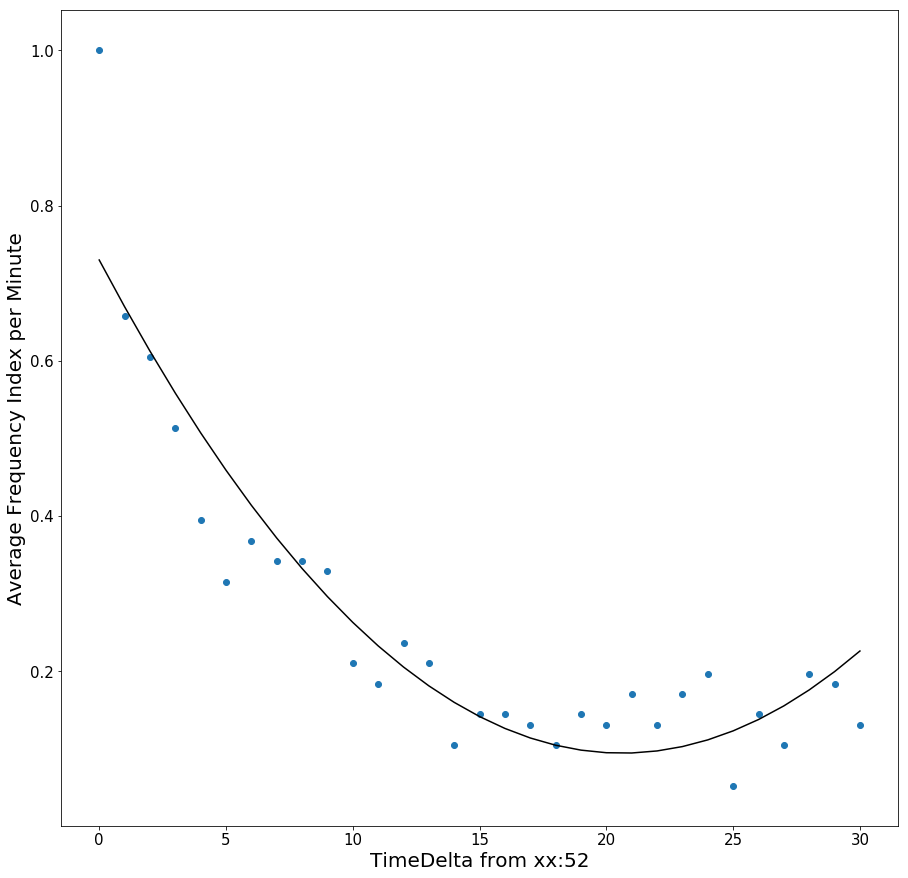

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(minute_dtframe_for_reg.index, minute_dtframe_for_reg['Average Frequency Index per Minute'])
curve = curvedmodel.params.x2 * (minute_dtframe_for_reg.index ** 2) + curvedmodel.params.x1 * minute_dtframe_for_reg.index + curvedmodel.params.const
ax.plot(minute_dtframe_for_reg.index, curve, color = 'k')
plt.xlabel('TimeDelta from xx:52', fontsize = 20)
plt.ylabel('Average Frequency Index per Minute', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Conclusion: In general, the frequency index of a time point decreases with the time difference from that time point and the nearest xx:52. The rate of decrease is increasing.

## Do men and women have different preferences in terms of the type of the skateboards?

To answer this question, I create a contigency table regarding gender and skateboard type.

In [12]:
sb_data_gender = sb_data.copy()
del sb_data_gender['Accident Description ']
sb_data_gender = sb_data_gender.rename(columns = {'Skateboard Type (S = Short, M = Medium, L = Long)': 'Type', 'Rider Gender (M = Male, F = Female)': 'Gender', 'Rider Type (G = Goofy or S = Straight)': 'G or S'})
contigency_table = pd.crosstab(sb_data_gender['Type'], sb_data_gender['Gender'])
contigency_table

Gender,F,M
Type,,
L,24,139
M,36,180
S,85,148


What is the Cramer's V?

In [13]:
from scipy import stats
def cramers_v(contigency_table):
    chi2 = stats.chi2_contingency(contigency_table)[0]
    n = contigency_table.sum().sum()
    phi2 = chi2/n
    r,k = contigency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
print('The Cramer\'s V of the association between gender and skateboard type is ' + str(cramers_v(contigency_table)) + '.')

The Cramer's V of the association between gender and skateboard type is 0.22964567510892803.


Conclusion: the value of Cramer's V implies that there is an association between gender and skateboard type, but it is not very strong.